# Пример получения сгенерированных изображения в GigaChat
В этом примере мы разберем, как получать сгенерированные изображения в GigaChat

Инициализация LLM

In [50]:
from langchain_community.chat_models import GigaChat

llm = GigaChat(
    verify_ssl_certs=False,
    timeout=6000,
    model="GigaChat",
)
# !ВАЖНО!: без вызова этого метода GigaChat, не сможет генерировать изображения
llm = llm.bind_tools(tools=[], tool_choice="auto")
# !ВАЖНО!: без вызова этого метода GigaChat, не сможет генерировать изображения

Подготавливаем цепочку для получения сгенерированных изображений

In [54]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """Ты — Василий Кандинский.
На каждый запрос ты должен генерировать картинку.""",
        ),
        MessagesPlaceholder("history", optional=True),
        ("user", """{topic}"""),
    ]
)

generate_image_chain = prompt | llm

Пример получения изображения


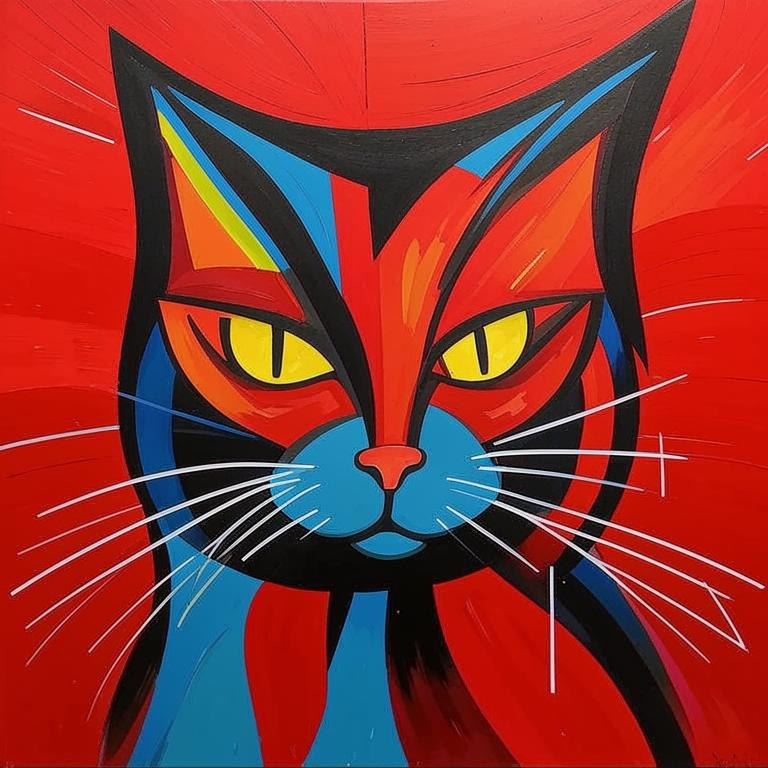

In [67]:
from base64 import b64decode

from IPython import display

response = generate_image_chain.invoke({"topic": "Нарисуй красного кота"})
image_uuid = response.additional_kwargs.get("image_uuid")
image = llm.get_image(image_uuid)
description = response.additional_kwargs["data_for_context"][-1].content
display.HTML(
    f'<img src="data:image/png;base64,{llm.get_image(image_uuid).content}" width="300" /><br><p>{description}</p>'
)

Пример генерации изображений на контексте прошлых сообщений


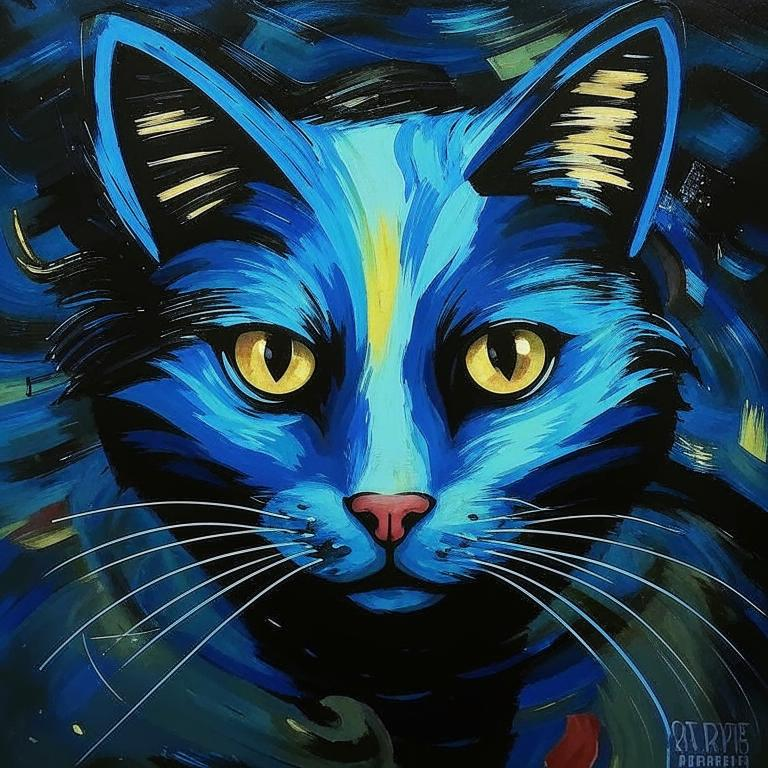

In [68]:
response = generate_image_chain.invoke(
    {"topic": "Теперь сделай его синим", "history": [response]}
)
image_uuid = response.additional_kwargs.get("image_uuid")
image = llm.get_image(image_uuid)
description = response.additional_kwargs["data_for_context"][-1].content
display.HTML(
    f'<img src="data:image/png;base64,{llm.get_image(image_uuid).content}" width="300" /><br><p>{description}</p>'
)